In [136]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-data-ai/Diabetes_Final_Data_V2.csv


In [137]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [138]:
# Importing dataset
dataset = pd.read_csv('/kaggle/input/diabetes-data-ai/Diabetes_Final_Data_V2.csv')

In [139]:
# Preview data
dataset.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,Female,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,No
1,35,Female,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,No
2,62,Female,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,No
3,73,Male,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,No
4,68,Female,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,No


In [140]:
# Dataset dimensions - (rows, columns)
dataset.shape

(5438, 15)

In [141]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5438 non-null   int64  
 1   gender                  5438 non-null   object 
 2   pulse_rate              5438 non-null   int64  
 3   systolic_bp             5438 non-null   int64  
 4   diastolic_bp            5438 non-null   int64  
 5   glucose                 5438 non-null   float64
 6   height                  5438 non-null   float64
 7   weight                  5438 non-null   float64
 8   bmi                     5438 non-null   float64
 9   family_diabetes         5438 non-null   int64  
 10  hypertensive            5438 non-null   int64  
 11  family_hypertension     5438 non-null   int64  
 12  cardiovascular_disease  5438 non-null   int64  
 13  stroke                  5438 non-null   int64  
 14  diabetic                5438 non-null   

In [142]:
dataset['gender'].replace('Male', 1, inplace = True)
print(dataset['gender'].value_counts())

Female    3859
1         1578
Other        1
Name: gender, dtype: int64


In [143]:
dataset['gender'].replace('Female', 0, inplace = True)
print(dataset['gender'].value_counts())

0        3859
1        1578
Other       1
Name: gender, dtype: int64


In [144]:
dataset['gender'].replace('Other', 0, inplace = True)
print(dataset['gender'].value_counts())

0    3860
1    1578
Name: gender, dtype: int64


In [145]:
dataset.astype({'gender': 'int64'}).dtypes

age                         int64
gender                      int64
pulse_rate                  int64
systolic_bp                 int64
diastolic_bp                int64
glucose                   float64
height                    float64
weight                    float64
bmi                       float64
family_diabetes             int64
hypertensive                int64
family_hypertension         int64
cardiovascular_disease      int64
stroke                      int64
diabetic                   object
dtype: object

In [146]:
dataset['diabetic'].replace('Yes', 1, inplace = True)
print(dataset['diabetic'].value_counts())

No    5094
1      344
Name: diabetic, dtype: int64


In [147]:
dataset['diabetic'].replace('No', 0, inplace = True)
print(dataset['diabetic'].value_counts())

0    5094
1     344
Name: diabetic, dtype: int64


In [148]:
dataset.astype({'diabetic': 'int64'}).dtypes

age                         int64
gender                      int64
pulse_rate                  int64
systolic_bp                 int64
diastolic_bp                int64
glucose                   float64
height                    float64
weight                    float64
bmi                       float64
family_diabetes             int64
hypertensive                int64
family_hypertension         int64
cardiovascular_disease      int64
stroke                      int64
diabetic                    int64
dtype: object

In [149]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5438 entries, 0 to 5437
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5438 non-null   int64  
 1   gender                  5438 non-null   int64  
 2   pulse_rate              5438 non-null   int64  
 3   systolic_bp             5438 non-null   int64  
 4   diastolic_bp            5438 non-null   int64  
 5   glucose                 5438 non-null   float64
 6   height                  5438 non-null   float64
 7   weight                  5438 non-null   float64
 8   bmi                     5438 non-null   float64
 9   family_diabetes         5438 non-null   int64  
 10  hypertensive            5438 non-null   int64  
 11  family_hypertension     5438 non-null   int64  
 12  cardiovascular_disease  5438 non-null   int64  
 13  stroke                  5438 non-null   int64  
 14  diabetic                5438 non-null   

In [150]:
# Preview data
dataset.head()

,age,gender,pulse_rate,systolic_bp,diastolic_bp,glucose,height,weight,bmi,family_diabetes,hypertensive,family_hypertension,cardiovascular_disease,stroke,diabetic
0,42,0,66,110,73,5.88,1.65,70.2,25.75,0,0,0,0,0,0
1,35,0,60,125,68,5.71,1.47,42.5,19.58,0,0,0,0,0,0
2,62,0,57,127,74,6.85,1.52,47.0,20.24,0,0,0,0,0,0
3,73,1,55,193,112,6.28,1.63,57.4,21.72,0,0,0,0,0,0
4,68,0,71,150,81,5.71,1.42,36.0,17.79,0,0,0,0,0,0


In [151]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5438.0,45.535491,14.320413,8.00,35.00,45.00,55.00,112.00
gender,5438.0,0.290180,0.453887,0.00,0.00,0.00,1.00,1.00
pulse_rate,5438.0,76.757080,12.320293,5.00,69.00,76.00,84.00,133.00
systolic_bp,5438.0,133.857300,22.291757,62.00,119.00,130.00,147.00,231.00
diastolic_bp,5438.0,82.064362,12.488475,45.00,73.00,81.00,90.00,119.00
glucose,5438.0,7.540583,2.922820,0.00,6.00,6.92,8.12,33.46
height,5438.0,1.548580,0.080951,0.36,1.52,1.55,1.60,1.96
weight,5438.0,53.627620,10.090797,3.00,46.70,53.00,59.90,100.70
bmi,5438.0,22.472335,8.777957,1.22,19.63,21.87,24.49,574.13
family_diabetes,5438.0,0.037330,0.189586,0.00,0.00,0.00,0.00,1.00


In [152]:
# Count of null values
dataset.isnull().sum()

age                       0
gender                    0
pulse_rate                0
systolic_bp               0
diastolic_bp              0
glucose                   0
height                    0
weight                    0
bmi                       0
family_diabetes           0
hypertensive              0
family_hypertension       0
cardiovascular_disease    0
stroke                    0
diabetic                  0
dtype: int64

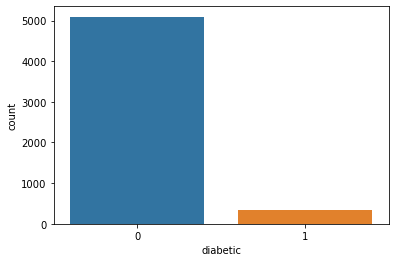

In [153]:
# Outcome countplot
sns.countplot(x = 'diabetic',data = dataset)

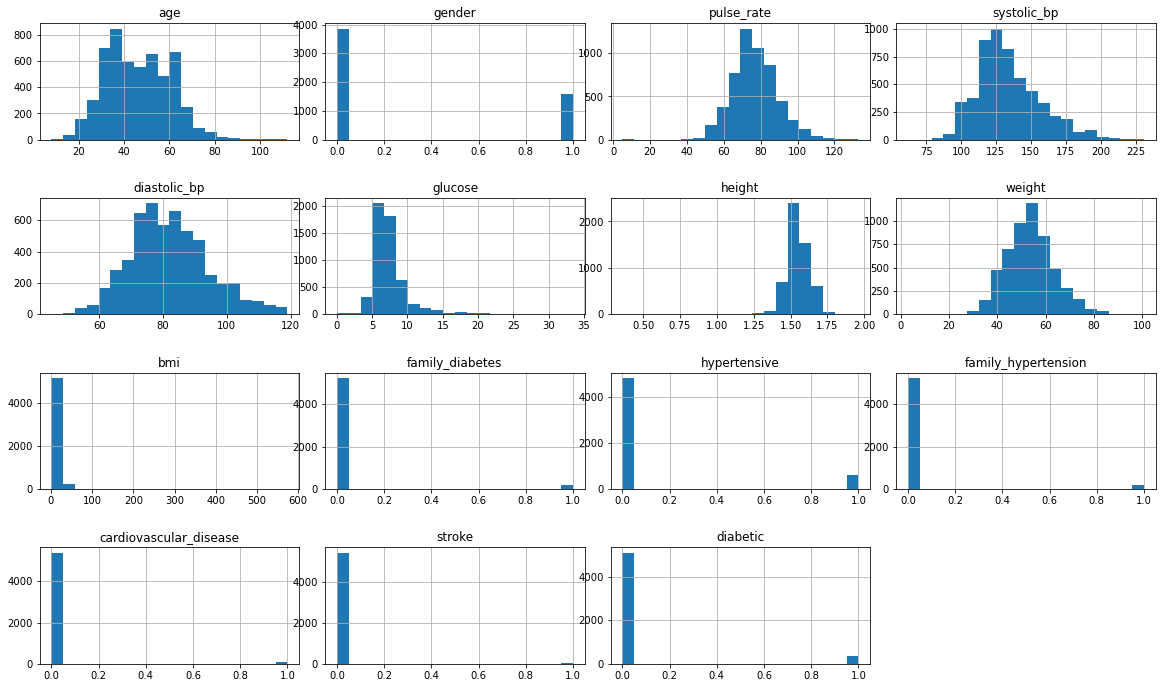

In [154]:
# Histogram of each feature
import itertools

col = dataset.columns[:15]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot((length/3), 4, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    dataset[i].hist(bins = 20)
    plt.title(i)
plt.show()

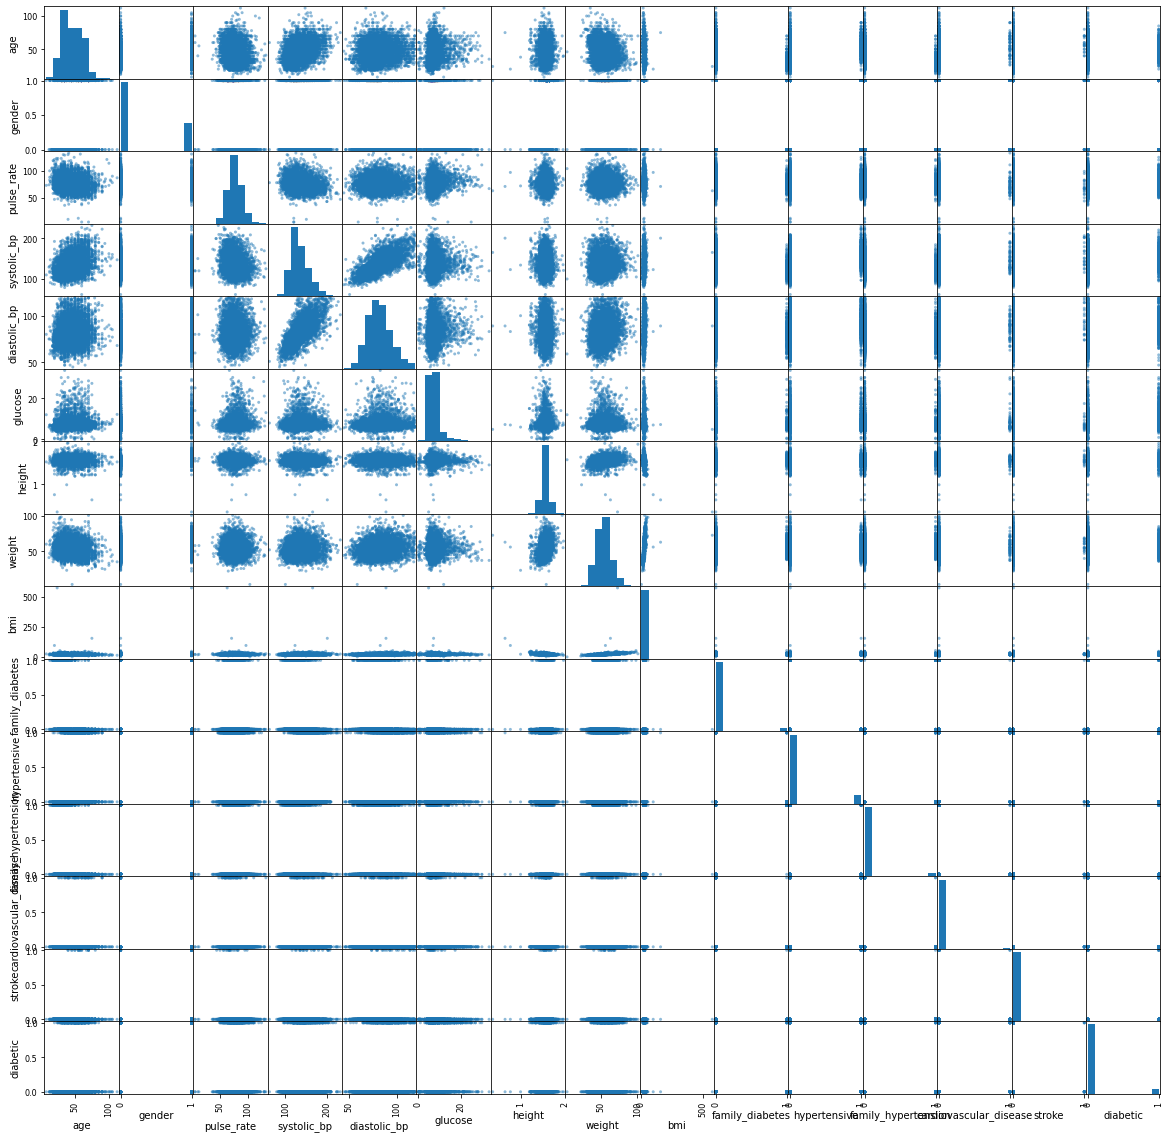

In [155]:
# Scatter plot matrix 
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize = (20, 20));

In [156]:
# # Pairplot 
# sns.pairplot(data = dataset, hue = 'diabetic', diag_kind='kde')
# plt.show()

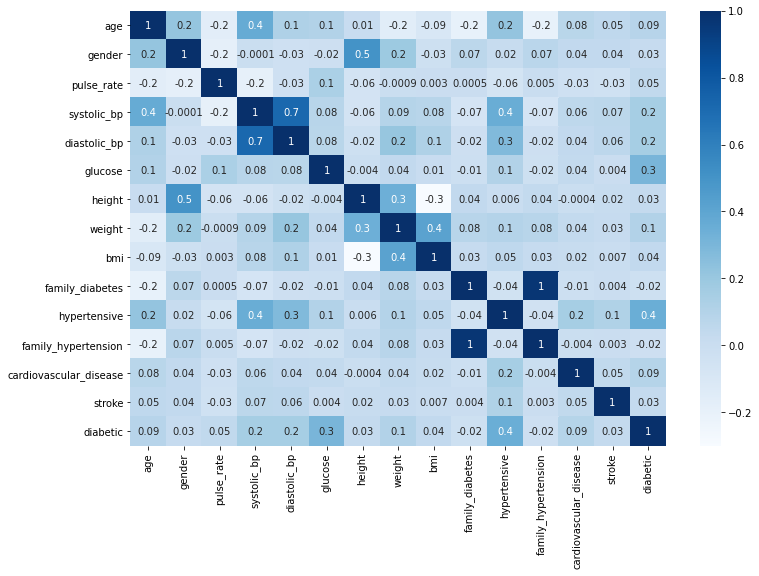

In [157]:
# Heatmap
sns.heatmap(dataset.corr(), annot=True, cmap="Blues", fmt='.1g')
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [158]:
Y = dataset['diabetic']
X = dataset.drop(columns= ['diabetic'])

In [159]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20,
                                   random_state = 100, stratify = dataset['diabetic'] )

In [160]:
# Checking dimensions
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (4350, 14)
X_test shape: (1088, 14)
Y_train shape: (4350,)
Y_test shape: (1088,)


In [161]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [162]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [163]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [164]:
# Random forest Algorithm
from sklearn.ensemble import RandomForestClassifier
ranfor = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 42)
ranfor.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=42)

In [165]:
# Making predictions on test dataset
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [166]:
from sklearn.metrics import accuracy_score
accuracy_svc = accuracy_score(Y_test, Y_pred_svc)
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(Y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(Y_test, Y_pred_ranfor)

In [167]:
# Accuracy on test set
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Support Vector Classifier: 93.65808823529412
Naive Bayes: 89.15441176470588
Decision tree: 90.53308823529412
Random Forest: 94.57720588235294


In [168]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_ranfor)
cm

array([[1012,    7],
       [  52,   17]])

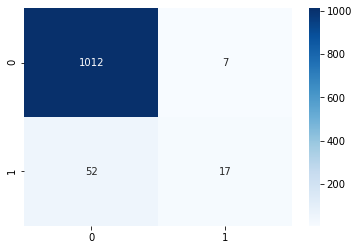

In [169]:
# Heatmap of Confusion matrix
sns.heatmap(pd.DataFrame(cm), annot=True, cmap='Blues', fmt='d')

In [170]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_ranfor))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1019
           1       0.71      0.25      0.37        69

    accuracy                           0.95      1088
   macro avg       0.83      0.62      0.67      1088
weighted avg       0.94      0.95      0.93      1088



In [174]:
# adding new Age Group column using age column

bins = [21, 30, 40, 50, 60, 81]
labels = ['21-29', '30-39', '40-49', '50-59', '60+']
dataset['age'] = pd.cut(dataset.age, bins, labels = labels,include_lowest = True)

print('Checking New Column:\n',dataset['age'].head())

Checking New Column:
 0    40-49
1    30-39
2      60+
3      60+
4      60+
Name: age, dtype: category
Categories (5, object): [21-29 < 30-39 < 40-49 < 50-59 < 60+]


Text(0.5, 1.0, 'Age Group Wise Count Of Diabetic and Non-Diabetic Patients')

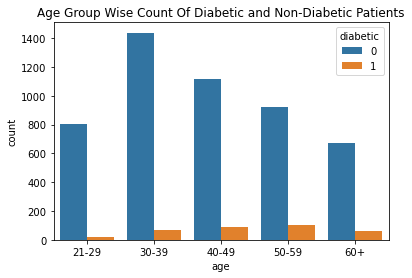

In [175]:
# ploting age group wise diabetic and non diabetic patients

sns.countplot(x="age", hue="diabetic", data=dataset)
plt.title('Age Group Wise Count Of Diabetic and Non-Diabetic Patients')

**Feature Importance**

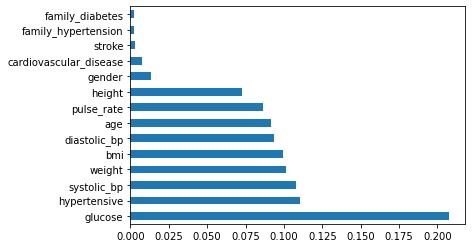

In [176]:
feat_importances = pd.Series(ranfor.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')